In [0]:
import pandas as pd
import pickle
import numpy as np
import librosa
#!pip install librosa

In [0]:
prosdic_features = pd.read_csv('new_data_with_prosodic.csv')

In [807]:
prosdic_features.head()

,Unnamed: 0,Unnamed: 0.1,emotions,gender,emotional_intensity,repetions,voice_channel,log_energy,zero_rate_cross,pitch,spec_center,spec_contrast,chroma
0,0,0,1,1,1,1,1,1.210089,0.276547,425.633360,2561.615654,18.579795,0.588629
1,1,1,1,1,1,2,1,0.953821,0.232797,135.463690,2389.013861,18.979816,0.561213
2,2,2,1,1,1,1,1,2.360058,0.276442,263.613601,2364.081624,18.604097,0.568334
3,3,3,1,1,1,2,1,1.963170,0.241621,400.331243,2265.299648,19.000360,0.572616
4,4,4,2,1,1,1,1,0.282539,0.232923,151.828945,2361.018676,18.629941,0.535452


In [0]:
x = prosdic_features.pitch.values #returns a numpy array
temp = (x-np.mean(x))/np.std(x)
prosdic_features['pitch'] = temp

x = prosdic_features.log_energy.values #returns a numpy array
temp = (x-np.mean(x))/np.std(x)
prosdic_features['log_energy'] = temp

In [809]:
prosdic_features = prosdic_features.drop(prosdic_features.columns[0:2],axis = 1)
prosdic_features.head()

,emotions,gender,emotional_intensity,repetions,voice_channel,log_energy,zero_rate_cross,pitch,spec_center,spec_contrast,chroma
0,1,1,1,1,1,0.609594,0.276547,0.129385,2561.615654,18.579795,0.588629
1,1,1,1,2,1,0.329755,0.232797,-1.063384,2389.013861,18.979816,0.561213
2,1,1,1,1,1,1.865338,0.276442,-0.536612,2364.081624,18.604097,0.568334
3,1,1,1,2,1,1.431944,0.241621,0.025379,2265.299648,19.000360,0.572616
4,2,1,1,1,1,-0.403272,0.232923,-0.996113,2361.018676,18.629941,0.535452


In [810]:
with open("mfcc_data", 'rb') as f:
    mfcc1 = pickle.load(f)
with open("pitch_data", 'rb') as f:
    pitchnew = pickle.load( f)
"""

with open("spectral_center_data", 'rb') as f:
    spectral_center1 = pickle.load(f)
with open("chroma_data", 'rb') as f:
    chroma1 = pickle.load(f)
with open("spectral_contrast_data", 'rb') as f:
    spectral_contrast1 = pickle.load(f)

with open("pitch1_data", 'rb') as f:
    pitch1new = pickle.load( f)
    
"""

'\n\nwith open("spectral_center_data", \'rb\') as f:\n    spectral_center1 = pickle.load(f)\nwith open("chroma_data", \'rb\') as f:\n    chroma1 = pickle.load(f)\nwith open("spectral_contrast_data", \'rb\') as f:\n    spectral_contrast1 = pickle.load(f)\n\nwith open("pitch1_data", \'rb\') as f:\n    pitch1new = pickle.load( f)\n    \n'

In [0]:
mfcc = []
spectral_center = []
chroma = []
spectral_contrast = []
pitch = []

for i in range(len(mfcc1)):
  mfcc.append(np.array(mfcc1[i]))
  pitch.append(np.array(pitchnew[i]))

In [0]:
from sklearn.preprocessing import StandardScaler 
for i in range(len(mfcc)):
  mfcc[i]= StandardScaler().fit_transform(mfcc[i])
 # chroma[i]= StandardScaler().fit_transform(chroma[i])
 # spectral_contrast[i]= StandardScaler().fit_transform(spectral_contrast[i])

In [0]:
maxmfcc = []
maxpitch = []
for i in range(len(mfcc1)):
  maxmfcc.append((mfcc[i]).shape[1])
  #maxpitch.append(len(pitch[i]))

In [814]:
mfcc_max = np.max(maxmfcc)

mfcc_max

165

In [0]:
def pad(mfcc):
  mfcc_new = []
  for i in range(len(mfcc)):
    arr = []
    for j in range(len(mfcc[i])):
      val = np.pad(mfcc[i][j], (0, 200-len(mfcc[i][j])), 'constant')
      arr.append(val)
    mfcc_new.append(np.array(arr))
  return mfcc_new

In [0]:
mfcc = pad(mfcc)


In [817]:
mfcc[0].shape

(20, 200)

In [0]:
mfcc = np.array(mfcc).reshape(len(mfcc),20,200)

In [819]:
mfcc.shape

(1440, 20, 200)

In [0]:
def append_features(mfcc_data,chroma_data):
  final = []
  for i in range(mfcc_data.shape[0]):
    new = np.concatenate((mfcc_data[i,:,:],chroma_data[i,:,:]))
    final.append(new)
  return np.array(final)

In [0]:
def append_values(data,feature):
  new_data = []
  for i in range(data.shape[0]):
    value = prosdic_features.iloc[i][feature]
    line = np.full((1,data[i].shape[1]),value)[0]
    line = line.reshape(1,data[i].shape[1])
    data1 = np.concatenate((data[i],line))
    new_data.append(data1)
  return np.array(new_data)

In [0]:
mfcc_with_pitch = append_values(mfcc,'pitch')

In [823]:
mfcc_with_pitch.shape

(1440, 21, 200)

In [0]:
mfcc_with_pitch_logenergy = append_values(mfcc_with_pitch,'log_energy')

In [825]:
mfcc_with_pitch_logenergy.shape

(1440, 22, 200)

In [0]:

#t1 = append_features(mfcc,chroma)
#t2 = append_features(t1,spectral_contrast)

In [827]:
mfcc.shape

(1440, 20, 200)

In [0]:
specs = np.asarray(mfcc_with_pitch_logenergy).reshape(len(mfcc_with_pitch_logenergy),22,200,1)
#specs = np.asarray(t2).reshape(len(t2),39,165,1)
features = np.concatenate((specs, np.zeros(np.shape(specs))), axis = 3)
for i in range(len(features)):
  features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])

In [0]:
features_speech = features

In [830]:
y_data = pd.read_csv('processed_new_data.csv')
y_data.drop([y_data.columns[0]],inplace = True,axis = 1)
y_data.head()

,emotional_intensity,repetions,neutral,calm,happy,sad,angry,fearful,disgust,surprised,male,female
0,1,1,1,0,0,0,0,0,0,0,1,0
1,1,2,1,0,0,0,0,0,0,0,1,0
2,1,1,1,0,0,0,0,0,0,0,1,0
3,1,2,1,0,0,0,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,0,0,1,0


In [831]:
y = y_data.loc[:,'neutral':'surprised']
y.head()

,neutral,calm,happy,sad,angry,fearful,disgust,surprised
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [0]:
y_speech = y

In [833]:
y_speech.shape

(1440, 8)

In [0]:
with open("mfcc_song_data", 'rb') as f:
    mfcc_song = pickle.load(f)
with open("pitch_song_data", 'rb') as f:
    pitch_song = pickle.load( f)

In [0]:
mfcc_songs = []
pitch_songs = []
for i in range(len(mfcc_song)):
  mfcc_songs.append(np.array(mfcc_song[i]))
  pitch_songs.append(np.array(pitch_song[i]))

In [0]:
pitch_songs= np.array(pitch_songs).ravel()


In [837]:
pitch_songs.shape

(1012,)

In [0]:
x = pitch_songs #returns a numpy array
temp = (x-np.mean(x))/np.std(x)


In [0]:
pitch_songs = temp


In [0]:
from sklearn.preprocessing import StandardScaler 
for i in range(len(mfcc_songs)):
  mfcc_songs[i]= StandardScaler().fit_transform(mfcc_songs[i])
  

In [0]:
maxmfcc_songs = []
maxpitch_songs = []
for i in range(len(mfcc_songs)):
  maxmfcc.append((mfcc_songs[i]).shape[1])

In [842]:
mfcc_max = np.max(maxmfcc)
mfcc_max

200

In [0]:
def pad(mfcc):
  mfcc_new = []
  for i in range(len(mfcc)):
    arr = []
    for j in range(len(mfcc[i])):
      val = np.pad(mfcc[i][j], (0, 200-len(mfcc[i][j])), 'constant')
      arr.append(val)
    mfcc_new.append(np.array(arr))
  return mfcc_new

In [0]:
mfcc_songs = pad(mfcc_songs)

In [0]:
mfcc_songs = np.array(mfcc_songs).reshape(len(mfcc_songs),20,200)

In [846]:
mfcc_songs.shape

(1012, 20, 200)

In [0]:
def append_values_songs(data,feature):
  new_data = []
  for i in range(data.shape[0]):
    value = pitch_songs[i]
    print (value)
    line = np.full((1,data[i].shape[1]),value)[0]
    line = line.reshape(1,data[i].shape[1])
    data1 = np.concatenate((data[i],line))
    new_data.append(data1)
  return np.array(new_data)

In [848]:
combined_songs = append_values_songs(mfcc_songs,pitch_songs)
combined_songs.shape

0.38708711532312695
-1.3367874430089115
-1.3327934012289069
-1.3387966924568644
-1.342817137100298
-1.3381966408403068
-1.360063590802275
-1.1108766785823565
-1.1170823996088288
-1.1095455313599127
-1.1092882530871935
-1.1047740057879085
0.37078200508901976
-0.48030709083654716
0.35126237264804516
1.1237052036690058
0.42253139105814674
0.3683304240457432
0.3903127507449009
0.4606238196347524
-1.3477724546995025
-1.3504282808237222
-1.3459239304692951
0.27794578027187766
-1.3556342343545116
-1.3574748223633242
-0.15345209071443083
-1.1558963305872691
-1.1574673727726092
0.3285316524128034
0.29889525737891337
-1.3281297595160166
1.2295896907909294
-1.13538354651286
1.1898007952002594
0.14742831796163353
0.28884298666683433
-1.3575145860969131
-1.1640489760422041
-1.3499458104436965
-1.145002488373729
0.3760282507695899
0.4397005151936566
0.44724867972513416
1.195014123342858
2.855958144109288
2.854775100952704
1.1643679153943067
-0.5163223386189839
-0.5288151657403303
-0.5246124706290349

(1012, 21, 200)

In [849]:
combined_songs.shape

(1012, 21, 200)

In [0]:
prosdic_features_songs = pd.read_csv('song_new_data_with_prosodic.csv')

In [851]:
prosdic_features_songs.head()

,Unnamed: 0,Unnamed: 0.1,emotional_intensity,repetions,neutral,calm,happy,sad,angry,fearful,male,female,log_energy,zero_rate_cross,pitch
0,0,0,1,1,1,0,0,0,0,0,1,0,1.435604,0.275862,349.147735
1,1,1,1,2,1,0,0,0,0,0,1,0,0.984460,0.251336,356.027898
2,2,2,1,1,1,0,0,0,0,0,1,0,1.236308,0.235192,350.963671
3,3,3,1,2,1,0,0,0,0,0,1,0,1.133245,0.278376,356.090107
4,4,4,1,1,0,1,0,0,0,0,1,0,0.671422,0.299620,345.419743


In [852]:
prosdic_features_songs = prosdic_features_songs.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
prosdic_features_songs.head()

,emotional_intensity,repetions,neutral,calm,happy,sad,angry,fearful,male,female,log_energy,zero_rate_cross,pitch
0,1,1,1,0,0,0,0,0,1,0,1.435604,0.275862,349.147735
1,1,2,1,0,0,0,0,0,1,0,0.984460,0.251336,356.027898
2,1,1,1,0,0,0,0,0,1,0,1.236308,0.235192,350.963671
3,1,2,1,0,0,0,0,0,1,0,1.133245,0.278376,356.090107
4,1,1,0,1,0,0,0,0,1,0,0.671422,0.299620,345.419743


In [853]:
y_speech.columns

Index(['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust',
       'surprised'],
      dtype='object')

In [854]:
y_songs = prosdic_features_songs.drop(['emotional_intensity','repetions','male','female','log_energy','zero_rate_cross','pitch'],axis=1)

y_songs['disgust'] = 0
y_songs['surprised'] = 0
y_songs.columns

Index(['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust',
       'surprised'],
      dtype='object')

In [0]:
def append_values_songs_energy(data,feature):
  new_data = []
  for i in range(data.shape[0]):
    value = prosdic_features_songs.iloc[i][feature]
    line = np.full((1,data[i].shape[1]),value)[0]
    line = line.reshape(1,data[i].shape[1])
    data1 = np.concatenate((data[i],line))
    new_data.append(data1)
  return np.array(new_data)

In [856]:
combined_songs = append_values_songs_energy(combined_songs,'log_energy')
combined_songs.shape

(1012, 22, 200)

In [857]:
features_songs = combined_songs
features_songs.shape

(1012, 22, 200)

In [0]:

specs = np.asarray(features_songs).reshape(len(features_songs),22,200,1)
#specs = np.asarray(features_songs).reshape(len(features_songs),21,200,1)
features = np.concatenate((specs, np.zeros(np.shape(specs))), axis = 3)
for i in range(len(features)):
  features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])

In [859]:
features_songs = features
features_songs.shape

(1012, 22, 200, 2)

In [860]:
features_speech.shape

(1440, 22, 200, 2)

In [861]:
features_combined = []
features_combined = np.append(features_speech,features_songs,axis=0)
features_combined.shape

(2452, 22, 200, 2)

In [862]:
y_speech.shape

(1440, 8)

In [863]:
y_combined = np.append(y_speech,y_songs,axis=0)
y_combined.shape

(2452, 8)

In [0]:
features = features_speech
y = y_speech

In [1473]:
features.shape

(1440, 22, 200, 2)

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam,SGD
from keras import backend as K

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(features.shape[1],features.shape[2],features.shape[3])))

In [0]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())


In [0]:

model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))


In [0]:
#sgd = SGD(lr = 0.01,decay = 1e-4,momentum = 0.9,nesterov = True)
adam = Adam(lr = 0.05,decay = 1e-3)

In [0]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


In [0]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.1, \
                                                    shuffle = True)


In [1489]:
cnnmodel = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,validation_data = (X_test,y_test))

Train on 1296 samples, validate on 144 samples
Epoch 1/20
1296/1296 [==============================] - 15s 11ms/step - loss: 1.9542 - acc: 0.2099 - val_loss: 1.6785 - val_acc: 0.3403
Epoch 2/20
1296/1296 [==============================] - 2s 2ms/step - loss: 1.6686 - acc: 0.3627 - val_loss: 1.6026 - val_acc: 0.3819
Epoch 3/20
1296/1296 [==============================] - 2s 2ms/step - loss: 1.5518 - acc: 0.3827 - val_loss: 1.5312 - val_acc: 0.4028
Epoch 4/20
1296/1296 [==============================] - 2s 2ms/step - loss: 1.4400 - acc: 0.4182 - val_loss: 1.4848 - val_acc: 0.4444
Epoch 5/20
1296/1296 [==============================] - 2s 2ms/step - loss: 1.3771 - acc: 0.4637 - val_loss: 1.4000 - val_acc: 0.4514
Epoch 6/20
1296/1296 [==============================] - 2s 2ms/step - loss: 1.2315 - acc: 0.5340 - val_loss: 1.4646 - val_acc: 0.4583
Epoch 7/20
1296/1296 [==============================] - 2s 2ms/step - loss: 1.1250 - acc: 0.5795 - val_loss: 1.3744 - val_acc: 0.5000
Epoch 8/20
12

In [1299]:
score = model.evaluate(X_test, y_test, verbose=1)

144/144 [==============================] - 0s 692us/step


In [1288]:

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1359168820910983
Test accuracy: 0.7222222222222222


<function matplotlib.pyplot.show>

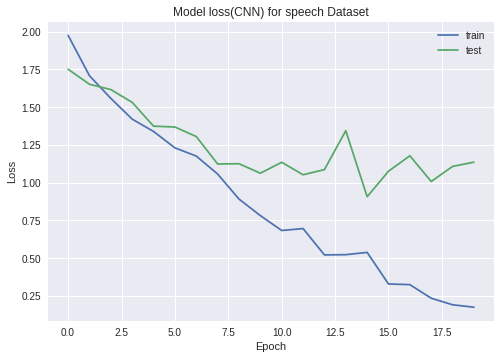

In [1289]:
import matplotlib.pyplot as plt
plt.plot(cnnmodel.history['loss'])
plt.plot(cnnmodel.history['val_loss'])
plt.title('Model loss(CNN) for speech Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc = 'upper right')
plt.show

<function matplotlib.pyplot.show>

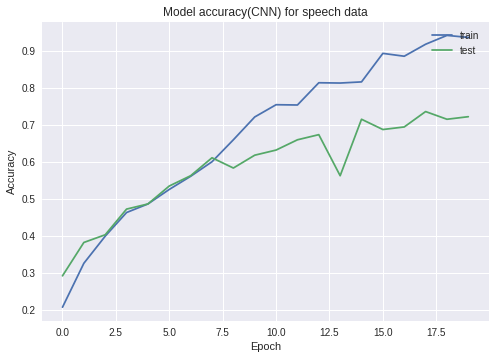

In [1290]:
import matplotlib.pyplot as plt
plt.plot(cnnmodel.history['acc'])
plt.plot(cnnmodel.history['val_acc'])
plt.title('Model accuracy(CNN) for speech data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc = 'upper right')
plt.show

In [0]:
# NEURAL NETWORK

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam,SGD
from keras.utils import np_utils
from sklearn import metrics

In [0]:
from keras.utils import to_categorical
num_labels = y.shape[1]

In [1302]:
features.shape

(1440, 22, 200, 2)

In [0]:
new_features = []
for i in range(len(features)):
  new_features.append(features[i].flatten())

In [0]:
new_features = np.array(new_features)

In [1319]:
new_features.shape

(1440, 8800)

In [0]:
model = Sequential()

In [0]:
model.add(Dense(1024, input_shape=(new_features.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

In [0]:
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [0]:
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [0]:
sgd = SGD(lr = 0.05,decay = 1e-5,momentum = 0.9,nesterov = True)
#adam = Adam(lr = 0.1,decay = 1e-3)

In [1359]:


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_208 (Dense)            (None, 1024)              9012224   
_________________________________________________________________
activation_91 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_137 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_209 (Dense)            (None, 256)               262400    
_________________________________________________________________
activation_92 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_138 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_210 (Dense)            (None, 8)                 2056      
__________

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_features, y, test_size=0.1, \
                                                   shuffle = True)

In [1361]:
nnmodel = model.fit(X_train, y_train, epochs=50,batch_size = 128, validation_data =(X_test,y_test) )

Train on 1296 samples, validate on 144 samples
Epoch 1/50
1296/1296 [==============================] - 13s 10ms/step - loss: 2.3581 - acc: 0.1752 - val_loss: 1.9191 - val_acc: 0.2222
Epoch 2/50
1296/1296 [==============================] - 0s 262us/step - loss: 1.9123 - acc: 0.2824 - val_loss: 1.8949 - val_acc: 0.2361
Epoch 3/50
1296/1296 [==============================] - 0s 266us/step - loss: 1.8648 - acc: 0.2778 - val_loss: 1.8613 - val_acc: 0.3125
Epoch 4/50
1296/1296 [==============================] - 0s 255us/step - loss: 1.7714 - acc: 0.3171 - val_loss: 1.8303 - val_acc: 0.3056
Epoch 5/50
1296/1296 [==============================] - 0s 258us/step - loss: 1.7346 - acc: 0.3356 - val_loss: 1.8113 - val_acc: 0.2569
Epoch 6/50
1296/1296 [==============================] - 0s 263us/step - loss: 1.7153 - acc: 0.3380 - val_loss: 1.7056 - val_acc: 0.3333
Epoch 7/50
1296/1296 [==============================] - 0s 259us/step - loss: 1.6345 - acc: 0.3603 - val_loss: 1.6627 - val_acc: 0.3542
E

In [0]:
pred = model.predict(features)

In [1493]:
features.shape

(1440, 22, 200, 2)

In [1494]:
score = model.evaluate(X_test, y_test, verbose=1)

144/144 [==============================] - 0s 920us/step


In [1495]:
#pred = model.predict(new_features)
#pred = np.argmax(pred,axis = 1)
#y_arg = np.argmax(y,axis = 1)
y = np.array(y)
final_pred=[]
for each in pred:
  arr = np.zeros(len(each))
  val = np.argmax(each)
  arr[val] = 1
  final_pred.append(arr)
final_pred = np.array(final_pred)
final_pred

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [1497]:
y.shape


(1440, 8)

In [0]:
arr=[]
for i in range(0,len(final_pred)):
  arr1 = final_pred[i]
  arr2 = np.array(y)[i]
  if np.array_equal(arr1,arr2):
    pass
  else:
    arr.append(final_pred[i])
arr = np.array(arr)


In [1503]:
df_temp = pd.DataFrame(arr)
df_temp.columns = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust',
       'surprised']
df_temp1 = df_temp.sum()
df_temp1['neutral'] = 7.21
df_temp1['calm'] = 1.03
df_temp1['happy'] = 3.62
df_temp1['sad'] = 5.18
df_temp1['angry'] = 4.66
df_temp1['fearful'] = 2.59
df_temp1['disgust'] = 5.69
df_temp1['surprised'] = 3.62
df_temp1

neutral      7.21
calm         1.03
happy        3.62
sad          5.18
angry        4.66
fearful      2.59
disgust      5.69
surprised    3.62
dtype: float64

In [1461]:
df_temp1

neutral       4.12
calm          9.32
happy         8.29
sad          35.75
angry         6.21
fearful       3.62
disgust      17.60
surprised    88.00
surprise     45.00
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Misclassification %')

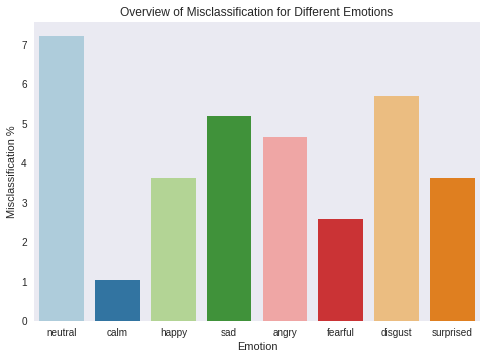

In [1506]:
#!pip install seaborn
import seaborn as sns

#sns.set(style = 'dark')
#sns.palplot(sns.color_palette('hls',8))

sns.barplot(x = df_temp.columns, y = df_temp1,palette = 'Paired')
plt.title('Overview of Misclassification for Different Emotions')
plt.xlabel('Emotion')
plt.ylabel('Misclassification %')

In [0]:
for i in range(len(np.array(y_train))):
  vals = np.where(np.equal(np.array(y_train[i]), np.array(pred[i])))

In [0]:
neutral = 0
calm = 0
happy = 0 
sad = 0
angry = 0
fearful = 0
disgust =0
surprised = 0
for i in range(len(arr)):
  if arr[i][0] == 1:
    neutral += 1
  if arr[i][1] == 1:
    calm += 1
  if arr[i][2] == 1:
    happy += 1
  if arr[i][3] == 1:
    sad += 1
  if arr[i][4] == 1:
    angry += 1
  if arr[i][5] == 1:
    fearful += 1
  if arr[i][6] == 1:
    disgust += 1
  if arr[i][7] == 1:
    surprised += 1

 

In [1397]:
print (neutral) 
print (calm) 
print (happy) 
print (sad )
print (angry) 
print (fearful) 
print (disgust)
print (surprised) 

96
192
192
192
192
192
192
192


In [1333]:

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4605920712153118
Test accuracy: 0.5763888888888888


<function matplotlib.pyplot.show>

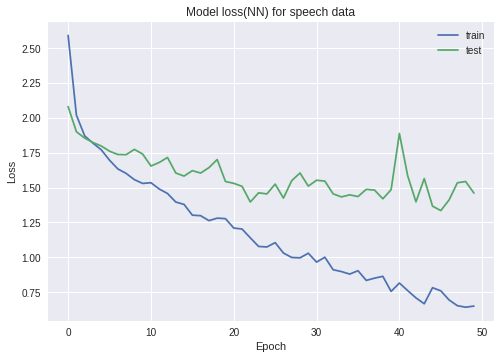

In [1335]:
import matplotlib.pyplot as plt
plt.plot(nnmodel.history['loss'])
plt.plot(nnmodel.history['val_loss'])
plt.title('Model loss(NN) for speech data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc = 'upper right')
plt.show

<function matplotlib.pyplot.show>

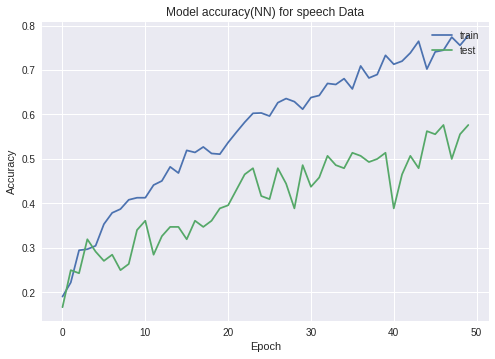

In [1336]:
import matplotlib.pyplot as plt
plt.plot(nnmodel.history['acc'])
plt.plot(nnmodel.history['val_acc'])
plt.title('Model accuracy(NN) for speech Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc = 'upper right')
plt.show

In [1038]:
y.shape

(2452, 8)

In [0]:
features.shape
new_features_lstm =features.reshape(features.shape[0],features.shape[1]*features.shape[2],2)

In [1039]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np



# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(new_features_lstm.shape[1], new_features_lstm.shape[2])))  # returns a sequence of vectors of dimension 32

model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_features_lstm, y, test_size=0.1, \
                                                    random_state=100,shuffle = True)
model.fit(X_train, y_train,
          batch_size=128, epochs=5,
          validation_data=(X_test, y_test))

Train on 2206 samples, validate on 246 samples
Epoch 1/5
1152/2206 [==============>...............] - ETA: 7:02 - loss: 2.0752 - acc: 0.1615

KeyboardInterrupt: ignored